In [1]:
import pandas as pd
from pypfopt import EfficientFrontier
from sklearn.covariance import ShrunkCovariance
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("features.csv")[65:]
data_test = pd.read_csv("results_all/xgb_test.csv")
open_cols = [col for col in data.columns if "OPEN" in col]
coins = set([col.split("_")[-1] for col in open_cols])


In [16]:
log_ret_cols = [col for col in data.columns if "Log_RET" in col]
log_ret_pred_cols = [col for col in data_test.columns if "Log_RET" in col]
log_ret_pred_cols = [col for col in log_ret_pred_cols if "_pred" in col]

In [ ]:
#FOR HISTORIC MEAN RETURNS
for coin in coins:
    data_test["historic_mean_{}".format(coin)] = data["Log_RET_{}".format(coin)].mean()


In [17]:
n_all = data.shape[0]

In [18]:
n_test = data_test.shape[0]

In [19]:
lookforward = 1

In [20]:
i = 0
df_ret_pred = data_test[log_ret_pred_cols][:-1]
df_ret_true = data_test[log_ret_cols][1:]


In [21]:
weightsV = []
for i in range(0, n_test-1):
    df_cov = data[log_ret_cols]
    df_ret_pred = data_test[log_ret_pred_cols][:-1]
    df_ret_pred
    ret_for_cov = df_cov[0:n_all - i]
    ret_pred = df_ret_pred.iloc[i]
    print(ret_pred)
    cov = ShrunkCovariance().fit(ret_for_cov).covariance_
    #calculate the portfolio weights
    ef = EfficientFrontier(ret_pred, cov, weight_bounds=(0,1))
    weights = ef.max_sharpe(risk_free_rate=0)
    cleaned_weights = ef.clean_weights()
    weightsV.append(cleaned_weights)

Log_RET_XRP_pred         0.003114
Log_RET_NEO_pred        -0.002557
Log_RET_Stellar_pred     0.006809
Log_RET_Dogecoin_pred    0.007166
Log_RET_Tether_pred      0.002951
Log_RET_XEM_pred        -0.032618
Log_RET_TRX_pred         0.004092
Log_RET_NXT_pred         0.047276
Log_RET_Ethereum_pred   -0.005316
Log_RET_PPC_pred         0.064981
Log_RET_BNB_pred         0.001804
Log_RET_BTC_pred         0.003299
Log_RET_Litecoin_pred   -0.006018
Name: 0, dtype: float64
Log_RET_XRP_pred        -0.006335
Log_RET_NEO_pred         0.014069
Log_RET_Stellar_pred     0.005912
Log_RET_Dogecoin_pred    0.004216
Log_RET_Tether_pred      0.002951
Log_RET_XEM_pred        -0.028069
Log_RET_TRX_pred        -0.002232
Log_RET_NXT_pred         0.093730
Log_RET_Ethereum_pred   -0.024619
Log_RET_PPC_pred         0.017242
Log_RET_BNB_pred         0.010135
Log_RET_BTC_pred        -0.008122
Log_RET_Litecoin_pred    0.008072
Name: 1, dtype: float64
Log_RET_XRP_pred        -0.004889
Log_RET_NEO_pred        -0.004261


In [22]:
#IF USING HISTORICAL MEANS PORTFOLIO USE THIS CODE
weights_hist_mean_df = []
for i in range(0, n_test-1):
    df_cov = data[log_ret_cols]
    df_ret_pred = data_test[log_ret_pred_cols][:-1]
    ret_for_cov = df_cov[0:n_all - i]

    ret_pred = df_ret_pred[0:i]
    
    if i == 0:
        ret_pred = df_ret_pred.iloc[i]
    print(type(ret_pred))
    cov = ShrunkCovariance().fit(ret_for_cov).covariance_
    #calculate the portfolio weights
    ef = EfficientFrontier(ret_pred, cov, weight_bounds=(0,1))
    weights = ef.max_sharpe(risk_free_rate=0)
    cleaned_weights = ef.clean_weights()
    weightsV.append(cleaned_weights)
weights_df = pd.DataFrame(weightsV)
weights_df.plot()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


TypeError: expected_returns is not a series, list or array

<AxesSubplot:>

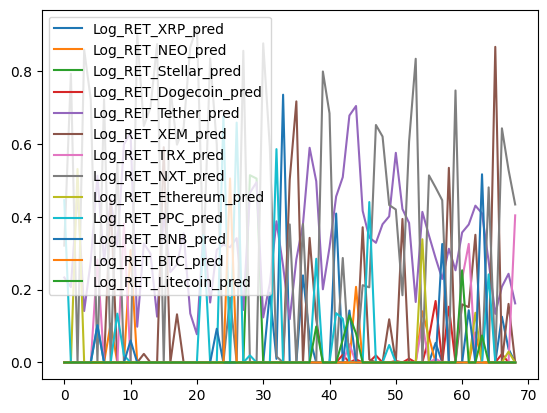

In [ ]:
#plot the weights
weights_df = pd.DataFrame(weightsV)
weights_df.plot()

<AxesSubplot:>

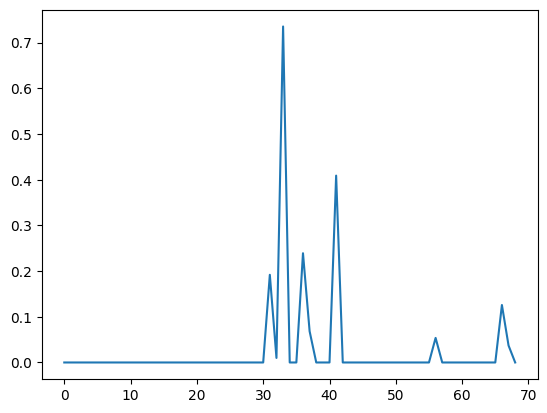

In [ ]:
# plot the weights of only 1st coin
weights_df.iloc[:,0].plot()


In [ ]:
df_ret_true.iloc[i] 

Log_RET_XRP         0.023326
Log_RET_NEO         0.000200
Log_RET_Stellar     0.017349
Log_RET_Dogecoin   -0.001101
Log_RET_Tether      0.000100
Log_RET_XEM         0.011731
Log_RET_TRX         0.001998
Log_RET_NXT         0.078719
Log_RET_Ethereum   -0.000800
Log_RET_PPC        -0.055513
Log_RET_BNB        -0.006320
Log_RET_BTC         0.010445
Log_RET_Litecoin    0.089384
Name: 69, dtype: float64

In [ ]:
n_coins = len(coins)
weights_avg = np.ones(n_coins)/n_coins

In [ ]:
#calculate the portfolio returns from the weights and df_ret_true
port_ret = []
for i in range(0, n_test-1):
    ret = np.dot(df_ret_true.iloc[i], weights_df.iloc[i])
    port_ret.append(ret) 

port_ret_hist_mean = []
for i in range(0, n_test-1):
    ret = np.dot(df_ret_true.iloc[i], weights_hist_mean_df.iloc[i])
    port_ret.append(ret) 
# portfolio of 1/n coins
port_ret_avg = []
for i in range(0, n_test-1):
    ret = np.dot(df_ret_true.iloc[i], weights_avg)
    port_ret_avg.append(ret)

In [ ]:
#calculate cumulative returns
cum_ret = np.cumprod(1+np.array(port_ret))
cum_ret_avg = np.cumprod(1+np.array(port_ret_avg))

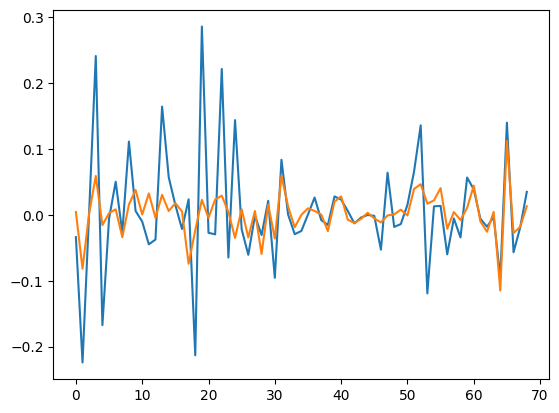

In [ ]:
# plot portfolio returns
plt.plot(port_ret)
plt.plot(port_ret_avg)

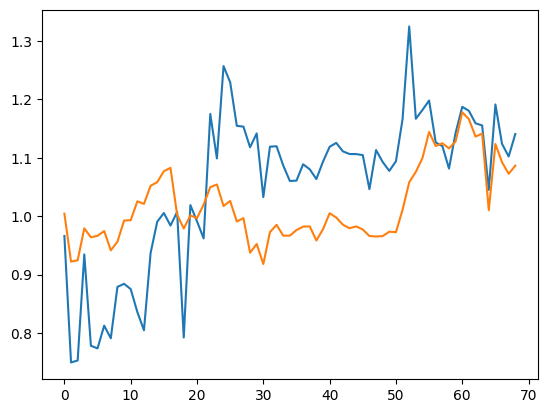

In [ ]:
#plot cumulative returns
plt.plot(cum_ret) #blue
plt.plot(cum_ret_avg)